<a href="https://colab.research.google.com/github/ECastro08/Alura-Store-Challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [26]:
import matplotlib.pyplot as plt


In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [31]:
ingreso_tienda1 = sum(tienda['Precio'])
ingreso_tienda2 = sum(tienda2['Precio'])
ingreso_tienda3 = sum(tienda3['Precio'])
ingreso_tienda4 = sum(tienda4['Precio'])

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# lista de tuplas con las ventas de cada tienda
tienda_ingreso = [(t,i) for t, i in zip(tiendas, ingresos)]
tienda_ingreso



[('Tienda 1', 1150880400.0),
 ('Tienda 2', 1116343500.0),
 ('Tienda 3', 1098019600.0),
 ('Tienda 4', 1038375700.0)]

## Grafico de los ingresos totales por cada tienda

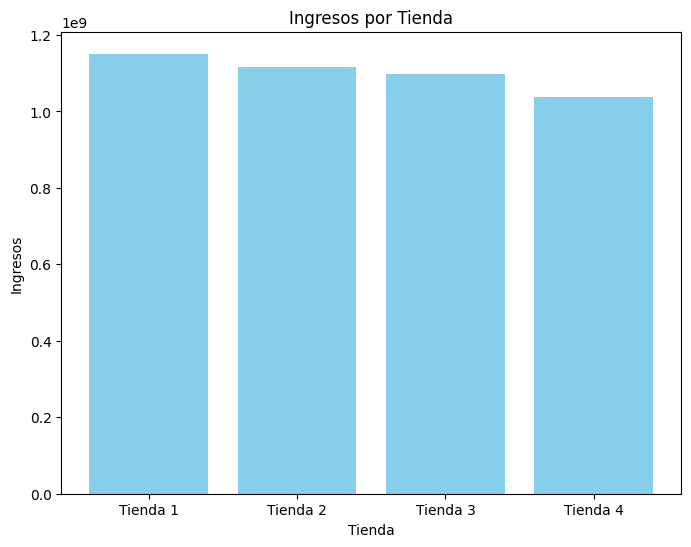

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(tiendas, ingresos, color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por Tienda')
plt.show()

# 2. Ventas por categoría

## Agrupando las columnas de cada uno de los datasets de las tiendas para ver la cantidad de productos vendidos

In [63]:
df1_ventas = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df2_ventas = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df3_ventas = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df4_ventas = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)


## Grafico Productos vendidos

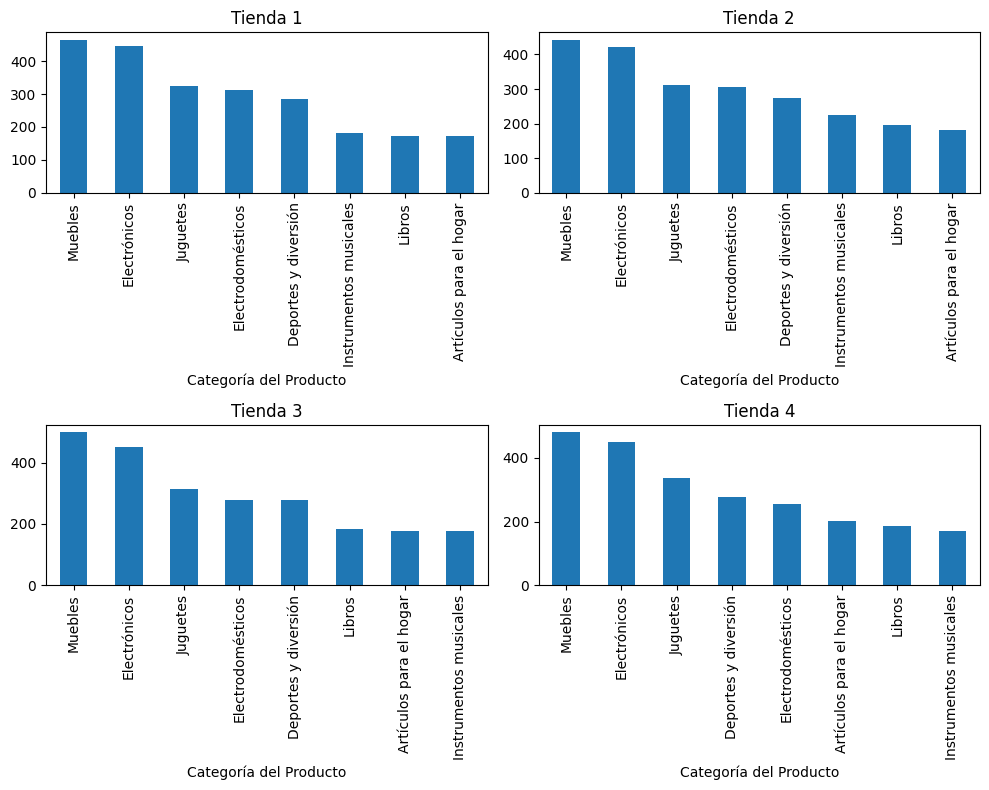

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

df1_ventas.plot(kind='bar', ax=axes[0, 0], title='Tienda 1')
df2_ventas.plot(kind='bar', ax=axes[0, 1], title='Tienda 2')
df3_ventas.plot(kind='bar', ax=axes[1, 0], title='Tienda 3')
df4_ventas.plot(kind='bar', ax=axes[1, 1], title='Tienda 4')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


## Tienda 1

In [64]:
calificacion_tienda1 = round(tienda.Calificación.mean(),3)
calificacion_tienda2 = round(tienda2.Calificación.mean(),3)
calificacion_tienda3 = round(tienda3.Calificación.mean(),3)
calificacion_tienda4 = round(tienda4.Calificación.mean(),3)

# 4. Productos más y menos vendidos

In [48]:
df_1 = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df_1

,Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [36]:
df_2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

In [37]:
df_3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

In [38]:
df_4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

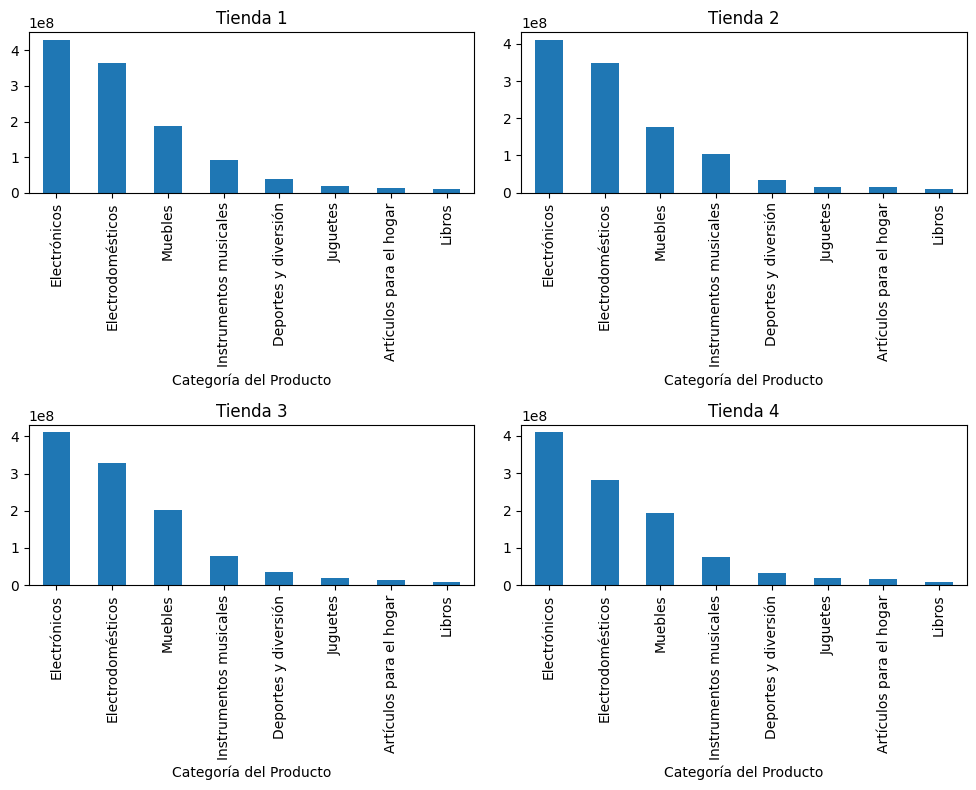

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

df_1.plot(kind='bar', ax=axes[0, 0], title='Tienda 1')
df_2.plot(kind='bar', ax=axes[0, 1], title='Tienda 2')
df_3.plot(kind='bar', ax=axes[1, 0], title='Tienda 3')
df_4.plot(kind='bar', ax=axes[1, 1], title='Tienda 4')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [40]:
tienda['costo_total_con_envio'] = tienda['Precio'] + tienda['Costo de envío']
tienda2['costo_total_con_envio'] = tienda2['Precio'] + tienda2['Costo de envío']
tienda3['costo_total_con_envio'] = tienda3['Precio'] + tienda3['Costo de envío']
tienda4['costo_total_con_envio'] = tienda4['Precio'] + tienda4['Costo de envío']



In [46]:
costo_1 = tienda.groupby('costo_total_con_envio').sum()

In [16]:
promedio_costo_tienda1 = round(tienda.costo_total_con_envio.mean(),3)
print(f'costo promedio de la venta con envio incluido para la tienda 1: {promedio_costo_tienda1}')

costo promedio de la venta con envio incluido para la tienda 1: 513886.52


In [17]:
promedio_costo_tienda2 = round(tienda2.costo_total_con_envio.mean(),3)
print(f'costo promedio de la venta con envio incluido para la tienda 2: {promedio_costo_tienda2}')

costo promedio de la venta con envio incluido para la tienda 2: 498443.663


In [18]:
promedio_costo_tienda3 = round(tienda3.costo_total_con_envio.mean(),3)
print(f'costo promedio de la venta con envio incluido para la tienda 3: {promedio_costo_tienda3}')

costo promedio de la venta con envio incluido para la tienda 3: 490265.451


In [19]:
promedio_costo_tienda4 = round(tienda4.costo_total_con_envio.mean(),3)
print(f'costo promedio de la venta con envio incluido para la tienda 4: {promedio_costo_tienda4}')

costo promedio de la venta con envio incluido para la tienda 4: 463822.349


In [25]:
promedios_envios = [promedio_costo_tienda1, promedio_costo_tienda2, promedio_costo_tienda3, promedio_costo_tienda4]
promedios_envios

[np.float64(513886.52),
 np.float64(498443.663),
 np.float64(490265.451),
 np.float64(463822.349)]